##**Linear Regression**
 A complete Python program to implement linear regression for house price prediction. The program includes generating a small synthetic dataset, splitting it into training and testing sets, fitting a linear regression model, and evaluating the model.

---

### **Explanation**

1. **Dataset Generation**:
   - Generates a synthetic dataset with 3 features: `SquareFootage`, `NumBedrooms`, and `AgeOfHouse`.
   - The target variable `Price` is generated using a linear relationship with some noise.

2. **Splitting Data**:
   - The dataset is split into training (80%) and testing (20%) sets using `train_test_split`.

3. **Model Training**:
   - A `LinearRegression` model from `sklearn` is fitted on the training data.

4. **Evaluation**:
   - Mean Squared Error (MSE) and \( $R^2$ \)-score are calculated to assess model performance.

5. **Visualization**:
   - A scatter plot shows the relationship between actual and predicted prices, with a reference line indicating perfect predictions.

---

### **Sample Output**
```
Sample of Generated Data:
   SquareFootage  NumBedrooms  AgeOfHouse         Price
0           2053            3          35  609095.094253
1           3818            2          18 1158373.918689
2           1740            3          41  510695.700416
3           2297            5          37  757156.731202
4           2099            4          20  745788.682970

Model Performance:
Mean Squared Error (MSE): 385807449.87
R-squared (R2): 0.96

Model Coefficients:
               Coefficient
SquareFootage      300.47
NumBedrooms      5228.53
AgeOfHouse      -2043.64
```
---

This program effectively demonstrates a complete pipeline for linear regression using Python, including dataset generation, model fitting, evaluation, and visualization.

Sample of Generated Data:
   SquareFootage  NumBedrooms  AgeOfHouse         Price
0           3674            1          49  1.015061e+06
1           1360            5          49  3.207130e+05
2           1794            5          12  5.765155e+05
3           1630            2          39  4.304767e+05
4           1595            5           2  4.756739e+05

Model Performance:
Mean Squared Error (MSE): 388320463.52
R-squared (R2): 1.00

Model Coefficients:
               Coefficient
SquareFootage   303.295131
NumBedrooms    6968.946139
AgeOfHouse    -1858.611639


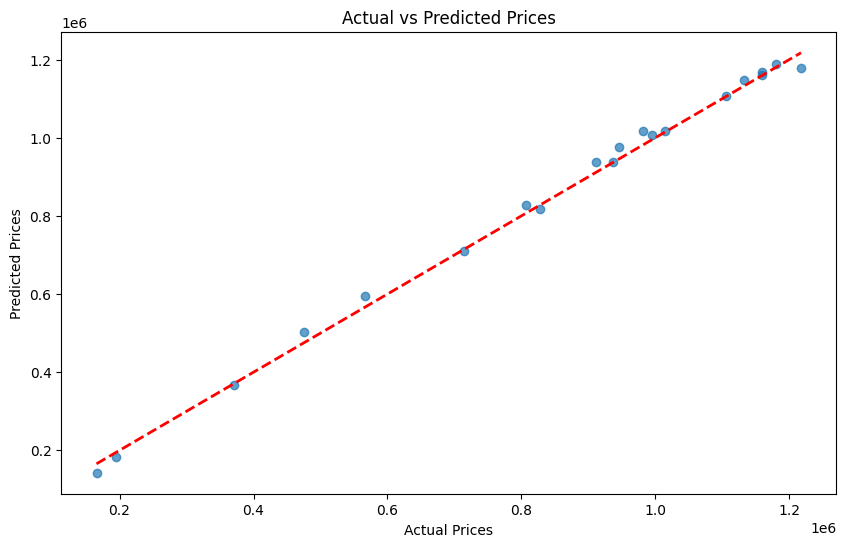

In [1]:
### **Python Program**

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Generate a synthetic dataset for house prices
def generate_dataset(num_samples=100, random_state=42):
    np.random.seed(random_state)
    # Features
    square_footage = np.random.randint(500, 4000, num_samples)  # Square footage
    num_bedrooms = np.random.randint(1, 6, num_samples)        # Number of bedrooms
    age_of_house = np.random.randint(1, 50, num_samples)       # Age of the house in years
    # True relationship with some noise
    price = (square_footage * 300) + (num_bedrooms * 5000) - (age_of_house * 2000) + np.random.normal(0, 20000, num_samples)
    data = pd.DataFrame({
        'SquareFootage': square_footage,
        'NumBedrooms': num_bedrooms,
        'AgeOfHouse': age_of_house,
        'Price': price
    })
    return data

# 2. Create dataset
data = generate_dataset()
print("Sample of Generated Data:")
print(data.head())

# 3. Split the dataset into features (X) and target variable (y)
X = data[['SquareFootage', 'NumBedrooms', 'AgeOfHouse']]
y = data['Price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# 7. Display the coefficients of the model
print("\nModel Coefficients:")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# 8. Visualize predictions vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

## **Maximum Likelihood Estimation (MLE) and Least Squares in Linear Regression**

---

### **1. Introduction**

Maximum Likelihood Estimation (MLE) is a method of estimating the parameters of a statistical model by maximizing the likelihood function, which measures how well the model explains the observed data. In linear regression, MLE provides a probabilistic foundation for estimating model parameters (e.g., coefficients).

For ordinary least squares (OLS) regression, MLE and least squares yield the same estimates when the errors are assumed to be normally distributed with constant variance. This connection arises because minimizing the sum of squared errors (as in least squares) is equivalent to maximizing the likelihood of the observed data under these assumptions.

---

### **2. Linear Regression Model**

In linear regression, the relationship between the dependent variable \( $y$ \) and the independent variables \( $X$ \) is:

\[
$y = X\beta + \epsilon$
\]

Where:
- \( $y$ \) is the vector of observed values (\( $n \times 1$ \)).
- \( $X$ \) is the design matrix of features (\( $n \times p$ \)).
- \( $\beta$ \) is the vector of regression coefficients (\( $p \times 1$ \)).
- \( epsilon4 \) represents the residuals, assumed to be i.i.d. and normally distributed: \( $epsilon \sim \mathcal{N}(0, \sigma^2)$ \).

The likelihood function measures the probability of observing \( $y ) given ( X ), ( beta ), and ( sigma^2 )$.

---

### **3. Maximum Likelihood Derivation**

#### **a. Likelihood Function**
The probability density function of \( $y$ \) is:

$p(y | X, \beta, \sigma^2) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - X_i \beta)^2}{2\sigma^2}\right)$

Taking the natural logarithm (log-likelihood):

$\ell(\beta, \sigma^2 | y, X) = -\frac{n}{2} \ln(2\pi) - \frac{n}{2} \ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - X_i \beta)^2$

#### **b. Maximizing with Respect to \( $\beta$ \)**
For a fixed \( \$sigma^2$ \), maximizing the log-likelihood is equivalent to minimizing the residual sum of squares (RSS):

$\text{RSS} = \sum_{i=1}^n (y_i - X_i \beta)^2$

The least-squares solution for \( $\beta$ \) is:

$\hat{\beta} = (X^T X)^{-1} X^T y$


This estimate minimizes the squared difference between the predicted and observed values.

#### **c. Maximizing with Respect to \( $sigma^2$ \)**
The MLE for ( $sigma^2$ ) is obtained by maximizing \( $\ell$ \) with respect to \( $sigma^2$ \):

$\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (y_i - X_i \hat{\beta})^2$

---

### **4. Key Insights**

- **MLE and Least Squares**: The MLE for \( $\beta$ \) coincides with the least-squares estimate under the assumption of normally distributed residuals.
- **Uncertainty Quantification**: MLE naturally incorporates the estimation of \( $sigma^2$ \), providing a measure of the uncertainty in the model.

---

### **6. Output**

For synthetic data generated as \( $y = 5 + 2X + \epsilon$ \), the output might be:

Estimated coefficients (Least Squares): [5.0298  1.9896]

Estimated variance ($sigma^2$): 3.9278

Scikit-learn Results:
Intercept: 5.0298

Coefficient: [1.9896]

---

### **7. Advantages of MLE**

- **Flexibility**: MLE is not restricted to linear models and can be extended to more complex models.
- **Probabilistic Framework**: MLE provides a formal framework for inference, including uncertainty estimation and hypothesis testing.
- **Connection to Bayesian Inference**: MLE serves as a foundation for Bayesian methods, where priors can be introduced.

### **8. Summary**

- **MLE in Linear Regression** estimates the model parameters \( $beta$ \) and \( $sigma^2$ \) by maximizing the likelihood of the data.
- **Least Squares** is a specific case of MLE under normal error assumptions.
- Both methods yield identical results for linear regression with Gaussian errors, making least squares a computationally efficient approach for parameter estimation.

In [2]:
### **5. Python Implementation**

#Here’s how MLE and least squares can be implemented for linear regression:

#### **a. Generate a Dataset**

import numpy as np

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # One feature, 100 samples
y = 5 + 2 * X.squeeze() + np.random.normal(0, 2, 100)  # True intercept = 5, slope = 2

# Add a bias term for the intercept
X_b = np.c_[np.ones((100, 1)), X]  # Add a column of ones for the intercept


#### **b. Compute Least Squares Estimate**

# Compute beta using the normal equation
beta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Estimated coefficients (Least Squares):", beta_hat)

#### **c. Maximum Likelihood Estimation**

# MLE implementation (explicit calculation)
n = len(y)
sigma2_hat = (1 / n) * np.sum((y - X_b.dot(beta_hat))**2)
print("Estimated variance (sigma^2):", sigma2_hat)

#### **d. Compare with Scikit-learn**

from sklearn.linear_model import LinearRegression

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

print("\nScikit-learn Results:")
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Estimated coefficients (Least Squares): [5.43019232 1.90804535]
Estimated variance (sigma^2): 3.2263382558682134

Scikit-learn Results:
Intercept: 5.430192315093501
Coefficient: [1.90804535]


##**Robust Linear Regression**
### **1. Introduction**

Linear regression assumes that the residuals (errors) are normally distributed and that outliers or deviations from this assumption do not significantly affect the model. However, in real-world data, outliers and non-normal error distributions can heavily influence the model, leading to biased parameter estimates.

**Robust Linear Regression** aims to overcome this limitation by reducing the influence of outliers on the regression model. It achieves this by employing alternative loss functions or weighting schemes that are less sensitive to extreme deviations.

---

### **2. Why Use Robust Linear Regression?**

- **Sensitivity to Outliers**: Ordinary Least Squares (OLS) minimizes the sum of squared residuals, which magnifies the influence of large errors (outliers).
- **Non-normal Error Distributions**: If the residuals are not normally distributed, robust methods provide more reliable parameter estimates.
- **Real-world Datasets**: Data often contains noise, outliers, or heteroscedasticity (non-constant variance of errors).

---



### **3. Techniques in Robust Linear Regression**

#### **a. M-Estimation**
- **Description**: M-estimators generalize least squares by replacing the squared loss function with a different one that reduces the influence of outliers.
- **Loss Functions**:
  - **Huber Loss**: Quadratic for small residuals and linear for large residuals.
  $\rho(e)$ =
    \begin{cases}
    \frac{1}{2} e^2, & \text{if } |e| \leq c \\
    c(|e| - \frac{c}{2}), & \text{if } |e| > c
    \end{cases}
  - **Tukey's Biweight**: Assigns zero weight to residuals larger than a threshold.
  - **Cauchy Loss**: Reduces the effect of large residuals with a logarithmic penalty.
- **Advantages**: Balances robustness and efficiency.

#### **b. Weighted Least Squares (WLS)**
- **Description**: Assigns weights to each data point, giving less importance to points with large residuals.
- **Weight Function**: Often derived iteratively using residuals from an initial OLS fit.

#### **c. Least Absolute Deviations (LAD)**
- **Description**: Minimizes the sum of absolute residuals instead of squared residuals.
- **Advantage**: Less sensitive to outliers than OLS.
- **Disadvantage**: Computationally intensive due to non-differentiability at zero.

#### **d. RANSAC (Random Sample Consensus)**
- **Description**: Iteratively fits the model using random subsets of data and selects the best model based on a consensus criterion.
- **Advantage**: Robust to a high proportion of outliers.
- **Disadvantage**: May require many iterations to converge.

---

OLS Coefficients: [1.90804535] 5.430192315093501
Huber Regression Coefficients: [1.89011537] 5.483327836581721


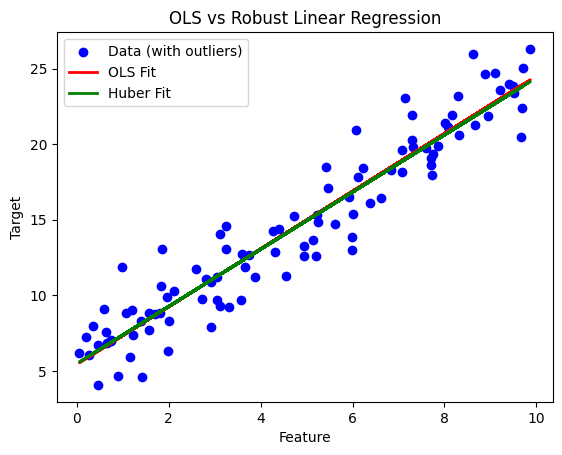

In [3]:
#### **b. Ordinary Least Squares (OLS)**
from sklearn.linear_model import LinearRegression
# Fit OLS model
ols_model = LinearRegression()
ols_model.fit(X, y)
y_pred_ols = ols_model.predict(X)

print("OLS Coefficients:", ols_model.coef_, ols_model.intercept_)


#### **c. Robust Linear Regression (Huber Loss)**
from sklearn.linear_model import HuberRegressor

# Fit HuberRegressor
huber_model = HuberRegressor()
huber_model.fit(X, y)
y_pred_huber = huber_model.predict(X)

print("Huber Regression Coefficients:", huber_model.coef_, huber_model.intercept_)

#### **d. Visualization**
# Compare OLS and Huber models
plt.scatter(X, y, color='blue', label='Data (with outliers)')
plt.plot(X, y_pred_ols, color='red', label='OLS Fit', linewidth=2)
plt.plot(X, y_pred_huber, color='green', label='Huber Fit', linewidth=2)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('OLS vs Robust Linear Regression')
plt.legend()
plt.show()

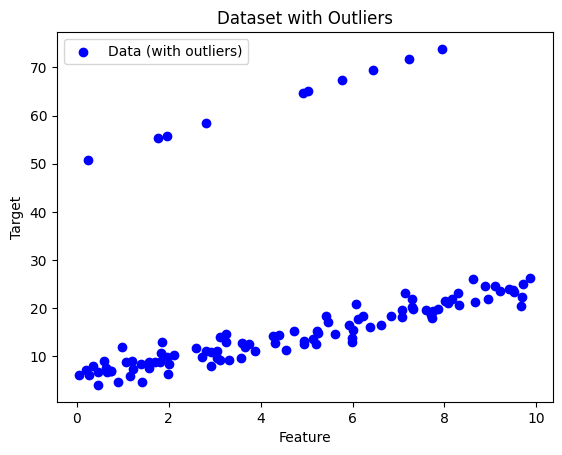

In [4]:
### **4. Python Implementation**

#### **a. Dataset with Outliers**
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature
y = 5 + 2 * X.squeeze() + np.random.normal(0, 2, 100)  # Linear relationship

# Introduce outliers
X_outliers = np.random.rand(10, 1) * 10
y_outliers = 50 + 3 * X_outliers.squeeze()  # Large deviations
X = np.vstack([X, X_outliers])
y = np.concatenate([y, y_outliers])

# Scatter plot of data
plt.scatter(X, y, color='blue', label='Data (with outliers)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Dataset with Outliers')
plt.legend()
plt.show()

### **5. Output and Results**

The visualization will show:
- **OLS Fit**: A regression line heavily influenced by outliers.
- **Huber Fit**: A regression line more resistant to the influence of outliers, providing a better fit for the majority of the data.

---

### **6. Advantages and Limitations**

#### **Advantages**:
- Handles outliers effectively.
- Flexible loss functions for various robustness needs.
- Often works well without requiring explicit outlier removal.

#### **Limitations**:
- Computationally more intensive than OLS.
- Requires tuning of hyperparameters (e.g., threshold for Huber loss).
- Not as interpretable as OLS in terms of residual analysis.

---

### **7. Conclusion**

Robust linear regression is a powerful tool for handling datasets with outliers or non-normal error distributions. By using alternative loss functions or iterative reweighting, it reduces the influence of extreme values, yielding more reliable parameter estimates. Implementing techniques like **Huber Regression** or **RANSAC** ensures robustness, making them invaluable for real-world datasets prone to noise or irregularities.

##**Ridge Regression**
### **1. Introduction**

Ridge regression is a type of linear regression that incorporates regularization to address the problem of multicollinearity and overfitting in high-dimensional datasets. It adds a penalty term to the Ordinary Least Squares (OLS) loss function, shrinking the coefficients to reduce their magnitude.

---

### **2. Key Concepts**

#### **a. Loss Function**
The ridge regression loss function modifies the OLS loss by adding a penalty proportional to the squared sum of the coefficients:

\[
$L(\beta) = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p \beta_j^2$
\]

Where:
- \( $y_i$ \) is the observed value.
- \( $\hat{y}_i$ \) is the predicted value (\( $hat{y}_i = X_i \beta$ \)).
- \( $lambda$ \) is the regularization parameter (controls the penalty).
- \( $beta_j$ \) are the model coefficients.

#### **b. Regularization Parameter (\( $lambda$ \))**
- Controls the trade-off between fitting the data (minimizing the residual sum of squares) and shrinking the coefficients.
  - \( $lambda = 0$ \): Equivalent to OLS regression.
  - \( $lambda \to \infty$ \): Coefficients shrink to zero.

#### **c. Shrinking Coefficients**
- Ridge regression shrinks coefficients towards zero but does not set them exactly to zero (unlike Lasso regression).
- This makes ridge suitable for cases where all predictors are relevant but multicollinearity exists.

---

### **3. Ridge Regression Solution**

The ridge regression solution can be derived analytically:

\[
$hat{\beta}_{ridge} = (X^T X + \lambda I)^{-1} X^T y$
\]

Where:
- \( $X$ \) is the design matrix.
- \( $I$ \) is the identity matrix.
- \( $lambda$ \) is the regularization parameter.

---

### **4. Why Use Ridge Regression?**

- **Multicollinearity**: When predictors are highly correlated, OLS estimates become unstable. Ridge stabilizes the estimates.
- **High Dimensionality**: Ridge handles datasets with many predictors effectively, especially when \( $p > n$ \) (more predictors than observations).
- **Overfitting**: Regularization prevents overfitting by introducing a penalty for large coefficients.

---

### **8. Advantages and Limitations**

#### **Advantages**:
- Reduces overfitting and stabilizes model estimates in the presence of multicollinearity.
- Works well for high-dimensional datasets.
- Retains all predictors, avoiding variable selection issues.

#### **Limitations**:
- Does not perform automatic feature selection (coefficients are shrunk but not set to zero).
- Requires tuning of the regularization parameter (\( $lambda$ \)).

---

### **9. Applications**

- Predictive modeling in finance, biology, and other domains with high-dimensional data.
- Scenarios with correlated predictors where traditional OLS fails.

---

### **10. Conclusion**

Ridge regression is an essential tool for improving the performance of linear models in the presence of multicollinearity and high-dimensionality. By introducing a penalty for large coefficients, ridge achieves a balance between bias and variance, yielding more robust and interpretable models.

In [5]:
### **5. Python Implementation**

#### **a. Dataset Creation**

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5)  # 5 predictors, 100 samples
true_coefficients = [3, 1.5, 0, 0, 2]  # Sparse true coefficients
y = X.dot(true_coefficients) + np.random.normal(0, 1, 100)  # Add noise

#### **b. Train-Test Split**
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **c. Ridge Regression Model**

# Train ridge regression model
ridge_model = Ridge(alpha=1.0)  # alpha = λ (regularization strength)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

# Evaluate performance
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Ridge Regression Results:")
print(f"Training MSE: {mse_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}")
print(f"Training R2: {r2_train:.2f}")
print(f"Testing R2: {r2_test:.2f}")
print("Coefficients:", ridge_model.coef_)

Ridge Regression Results:
Training MSE: 1.20
Testing MSE: 0.99
Training R2: 0.42
Testing R2: 0.37
Coefficients: [2.27802343 1.06986023 0.51642818 0.17933551 1.33561518]


In [6]:
#### **d. Compare Ridge with OLS**

from sklearn.linear_model import LinearRegression

# Train OLS model
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

print("\nOLS Results:")
print("Coefficients:", ols_model.coef_)


OLS Results:
Coefficients: [2.65295867 1.26607667 0.64790329 0.1455846  1.55435983]


In [7]:
### **6. Hyperparameter Tuning**

#The regularization parameter \( \lambda \) can be optimized using cross-validation:

from sklearn.model_selection import GridSearchCV

# Grid search for optimal alpha
alphas = np.logspace(-4, 4, 50)  # Range of alpha values
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': alphas}, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)

print("\nOptimal Alpha:", ridge_cv.best_params_['alpha'])
print("Best Cross-Validated MSE:", -ridge_cv.best_score_)


Optimal Alpha: 0.2682695795279725
Best Cross-Validated MSE: 1.4002342925797986


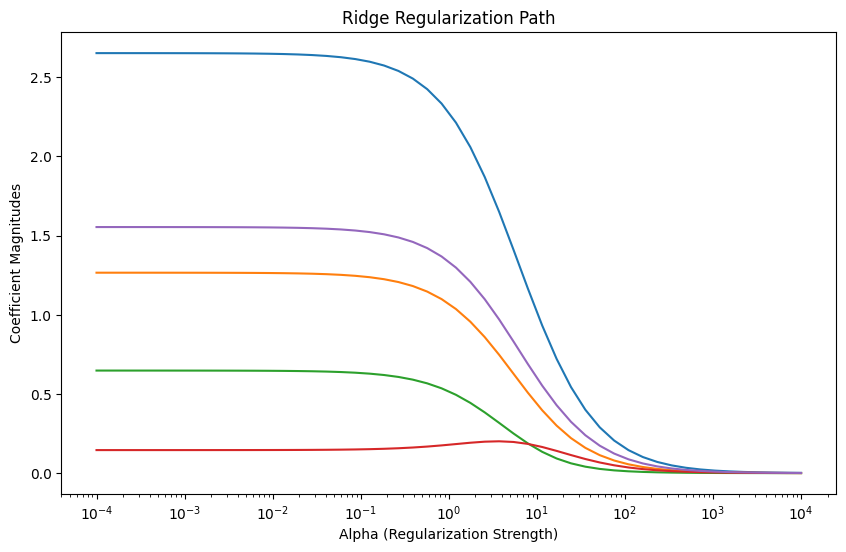

In [8]:
### **7. Visualizing Ridge Regularization**
# Coefficients vs Alpha
coefficients = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    coefficients.append(ridge_model.coef_)

coefficients = np.array(coefficients)

plt.figure(figsize=(10, 6))
plt.plot(alphas, coefficients)
plt.xscale('log')
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Coefficient Magnitudes")
plt.title("Ridge Regularization Path")
plt.show()

##**Lasso Regression**
### **1. Introduction**

Lasso regression (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that incorporates \( $L_1$ \)-regularization. It adds a penalty proportional to the absolute values of the coefficients to the loss function, encouraging sparsity. Unlike ridge regression, Lasso can shrink some coefficients to exactly zero, effectively performing feature selection.

---

### **2. Key Concepts**

#### **a. Loss Function**
The Lasso regression loss function modifies the Ordinary Least Squares (OLS) loss by adding an \( $L_1$ \)-norm penalty:

\[
$L(\beta) = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p |\beta_j|$
\]

Where:
- \( $y_i$ \) is the observed value.
- \( $hat{y}_i$ \) is the predicted value (\( $hat{y}_i = X_i \beta$ \)).
- \( $lambda$ \) is the regularization parameter.
- \( $|\beta_j|$ \) is the absolute value of the coefficient for the \( $j$ \)-th predictor.

#### **b. Regularization Parameter (\( $lambda$ \))**
- Controls the trade-off between fitting the data and shrinking coefficients:
  - \( $lambda = 0$ \): Equivalent to OLS regression.
  - Large \( $lambda$ \): Shrinks coefficients more, possibly to zero.
- Higher values of \( $lambda$ \) increase sparsity, leading to fewer active predictors.

#### **c. Feature Selection**
- Lasso can set some coefficients to exactly zero, effectively excluding irrelevant features from the model.
- This makes it particularly useful for high-dimensional datasets where feature selection is critical.

---

### **3. Why Use Lasso Regression?**

- **Feature Selection**: Lasso automatically identifies and selects the most important predictors.
- **Overfitting**: Regularization prevents overfitting by shrinking coefficients.
- **High Dimensionality**: Works well when the number of predictors (\( $p$ \)) is larger than the number of observations (\( $n$ \)).

---

### **4. Differences from Ridge Regression**

| **Aspect**         | **Ridge Regression**                  | **Lasso Regression**               |
|---------------------|---------------------------------------|-------------------------------------|
| **Penalty Type**    | \( $L_2$ \)-norm (\( $sum \beta_j^2$ \)) | \( $L_1$ \)-norm (\( $sum |\beta_j|$ \)) |
| **Coefficient Shrinkage** | Shrinks coefficients but retains all | Can shrink some coefficients to zero |
| **Feature Selection** | No (all variables are retained)      | Yes (performs automatic selection) |

---

### **5. Lasso Regression Solution**

The optimization problem is:

\[$hat{\beta}_{lasso} = \arg\min_\beta \left( \sum_{i=1}^n (y_i - X_i \beta)^2 + \lambda \sum_{j=1}^p |\beta_j| \right)$\]

This cannot be solved analytically (unlike ridge regression) but is computed using algorithms like coordinate descent.

---

### **8. Advantages and Limitations**

#### **Advantages**:
- Performs feature selection and regularization simultaneously.
- Reduces model complexity by excluding irrelevant predictors.
- Useful for high-dimensional data.

#### **Limitations**:
- Can struggle when predictors are highly correlated (elastic net is better in such cases).
- Sensitive to the choice of \( $lambda$ \).
- Non-differentiability at zero can make optimization more challenging.

---

### **9. Applications**

- Predictive modeling in fields like genomics, finance, and text analysis where there are many irrelevant features.
- Any situation requiring automatic variable selection to identify significant predictors.

---

### **10. Conclusion**

Lasso regression is a powerful tool for linear modeling when feature selection and regularization are needed. By introducing \( $L_1$ \)-regularization, it can exclude irrelevant predictors and provide interpretable models, making it highly effective for high-dimensional or sparse datasets.

In [9]:
### **6. Python Implementation**

#### **a. Dataset Creation**

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 10)  # 10 predictors, 100 samples
true_coefficients = [3, 1.5, 0, 0, 2, 0, 0, 0, 0, 0]  # Sparse true coefficients
y = X.dot(true_coefficients) + np.random.normal(0, 1, 100)  # Add noise

#### **b. Train-Test Split**

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **c. Lasso Regression Model**

# Train Lasso regression model
lasso_model = Lasso(alpha=0.1)  # alpha = λ (regularization strength)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_train = lasso_model.predict(X_train)
y_pred_test = lasso_model.predict(X_test)

# Evaluate performance
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Lasso Regression Results:")
print(f"Training MSE: {mse_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}")
print(f"Training R2: {r2_train:.2f}")
print(f"Testing R2: {r2_test:.2f}")
print("Coefficients:", lasso_model.coef_)

Lasso Regression Results:
Training MSE: 1.23
Testing MSE: 0.94
Training R2: 0.50
Testing R2: 0.45
Coefficients: [ 2.06330701  0.         -0.         -0.          1.20178584  0.
 -0.         -0.         -0.          0.        ]


In [10]:
#### **d. Compare with OLS**

from sklearn.linear_model import LinearRegression

# Train OLS model
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

print("\nOLS Results:")
print("Coefficients:", ols_model.coef_)



OLS Results:
Coefficients: [ 3.26375714  1.45405612 -0.41723118 -0.37889037  2.09587458  0.12455651
 -0.19257922 -0.50937107 -0.12847812  0.25273415]


In [11]:
### **7. Hyperparameter Tuning**

#To optimize (lambda, use cross-validation:

from sklearn.model_selection import GridSearchCV

# Grid search for optimal alpha
alphas = np.logspace(-4, 1, 50)  # Range of alpha values
lasso_cv = GridSearchCV(Lasso(), param_grid={'alpha': alphas}, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, y_train)

print("\nOptimal Alpha:", lasso_cv.best_params_['alpha'])
print("Best Cross-Validated MSE:", -lasso_cv.best_score_)


Optimal Alpha: 0.0013257113655901094
Best Cross-Validated MSE: 1.0859174015453212


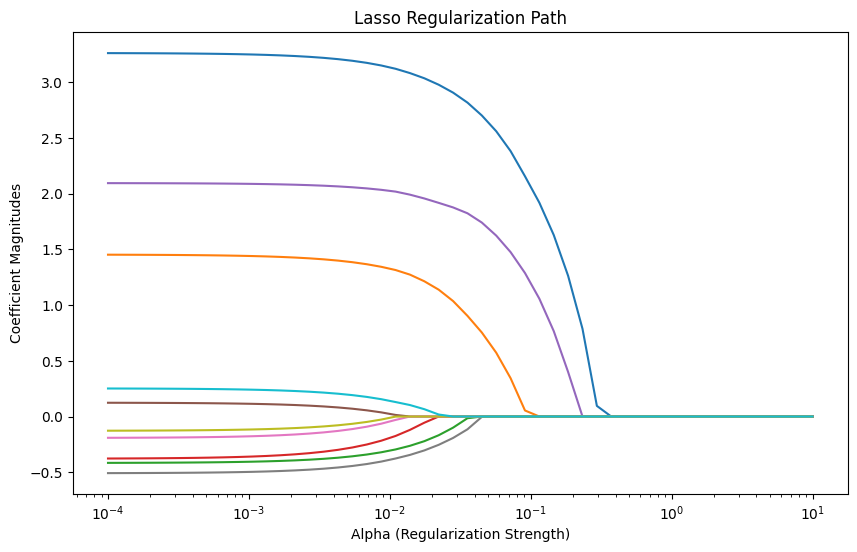

In [12]:
#### **Visualization of Coefficients**
# Coefficients vs Alpha
coefficients = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    coefficients.append(lasso_model.coef_)

coefficients = np.array(coefficients)

plt.figure(figsize=(10, 6))
plt.plot(alphas, coefficients)
plt.xscale('log')
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Coefficient Magnitudes")
plt.title("Lasso Regularization Path")
plt.show()

##**Bayesian Linear Regression**
### **1. Introduction**

Bayesian Linear Regression is a probabilistic approach to linear regression where uncertainty in the parameters and predictions is explicitly modeled using Bayesian inference. Unlike ordinary least squares (OLS) regression, which provides point estimates for the parameters, Bayesian regression provides a **posterior distribution** for the parameters, reflecting uncertainty.

---

### **2. Key Concepts**

#### **a. Bayesian Framework**

In the Bayesian framework, the goal is to compute the posterior distribution of the model parameters (\( $\beta$ \)) given the data:

\[$P(\beta | X, y) = \frac{P(y | X, \beta) P(\beta)}{P(y | X)}$\]

Where:
- \( $P(\beta | X, y)$ \): Posterior distribution of parameters.
- \( $P(y | X, \beta)$ \): Likelihood of the data given parameters.
- \( $P(\beta)$ \): Prior distribution of the parameters.
- \( $P(y | X)$ \): Evidence, a normalization constant.

#### **b. Likelihood**

The likelihood assumes that the observed target (\( $y$ \)) is generated by the linear model with Gaussian noise:

\[$P(y | X, \beta, \sigma^2) = \mathcal{N}(y | X\beta, \sigma^2 I)$\]

Where:
- \( $\mathcal{N}$ \) represents a normal distribution.
- \( $\sigma^2$ \): Variance of the noise.

#### **c. Prior Distribution**

A prior distribution \( P(\beta) \) is placed on the coefficients. Common choices include:
- **Gaussian Prior**:
  \[$P(\beta) = \mathcal{N}(\beta | \mu_\beta\Sigma_\beta)$\]
  - \( $\mu_\beta$ \): Mean of the prior.
  - \( $\Sigma_\beta$ \): Covariance matrix (controls prior uncertainty).

#### **d. Posterior Distribution**

Using Bayes' theorem, the posterior distribution is computed as:

\[$P(\beta | X, y) = \mathcal{N}(\beta | \mu_{\text{post}}, \Sigma_{\text{post}})$\]

Where:
- \( $\mu_{\text{post}} = \Sigma_{\text{post}} (X^T y / \sigma^2 + \Sigma_\beta^{-1} \mu_\beta)$ \)
- \( $\Sigma_{\text{post}} = (X^T X / \sigma^2 + \Sigma_\beta^{-1})^{-1}$ \)

---

### **3. Predictive Distribution**

For a new data point \( $X_{\text{new}}$ \), the predictive distribution for \( $y_{\text{new}}$ \) is given by:

\[$P(y_{\text{new}} | X_{\text{new}}, X, y) = \mathcal{N}(y_{\text{new}} | \mu_{\text{pred}}, \sigma_{\text{pred}}^2)$\]

Where:
- \( $\mu_{\text{pred}} = X_{\text{new}} \mu_{\text{post}}$ \)
- \( $\sigma_{\text{pred}}^2 = X_{\text{new}} \Sigma_{\text{post}} X_{\text{new}}^T + \sigma^2 )$

---

### **4. Advantages of Bayesian Linear Regression**

- **Uncertainty Quantification**: Provides distributions over parameters and predictions.
- **Regularization**: The prior acts as a form of regularization (similar to ridge regression for Gaussian priors).
- **Robustness**: Handles small datasets better by incorporating prior knowledge.

---

### **6. Results and Interpretation**

- **Posterior Mean**: Provides the most likely values of the parameters based on the data and prior.
- **Posterior Covariance**: Captures uncertainty in parameter estimates.
- **Predictive Distribution**: Includes uncertainty in predictions, shown as confidence intervals.

---

### **7. Advantages and Limitations**

#### **Advantages**:
- Captures parameter uncertainty explicitly.
- Provides a full predictive distribution, not just point estimates.
- Naturally incorporates prior knowledge.

#### **Limitations**:
- Computationally intensive for large datasets.
- Requires specifying priors, which may be subjective.

---

### **8. Applications**

- Financial modeling (e.g., portfolio optimization).
- Medical research (e.g., modeling treatment effects with uncertainty).
- Small datasets where uncertainty quantification is critical.

---

### **9. Conclusion**

Bayesian Linear Regression extends classical linear regression by explicitly modeling uncertainty in parameters and predictions. Its probabilistic nature makes it ideal for small datasets and situations where uncertainty is critical, providing both parameter estimates and confidence intervals for predictions.

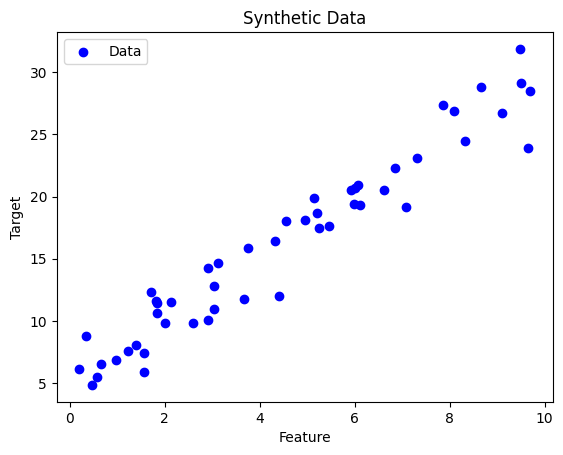

In [13]:
### **5. Python Implementation**

#### **a. Generate Synthetic Data**
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(50, 1) * 10  # 50 samples, 1 feature
true_slope = 2.5
true_intercept = 5
noise = np.random.normal(0, 2, size=(50,))
y = true_slope * X.squeeze() + true_intercept + noise

# Scatter plot of data
plt.scatter(X, y, color='blue', label='Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Synthetic Data')
plt.legend()
plt.show()

In [14]:
#### **b. Implement Bayesian Linear Regression**

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

# Bayesian linear regression implementation
def bayesian_linear_regression(X, y, alpha_prior, beta_prior, noise_variance):
    """
    X: Features matrix (n_samples, n_features)
    y: Target vector (n_samples,)
    alpha_prior: Precision of prior (1 / variance of coefficients)
    beta_prior: Mean of prior
    noise_variance: Variance of noise in observations
    """
    X = np.c_[np.ones(X.shape[0]), X]  # Add intercept term

    # Prior
    beta_prior_mean = beta_prior  # Prior mean
    beta_prior_cov = (1 / alpha_prior) * np.eye(X.shape[1])  # Prior covariance matrix

    # Likelihood components
    precision_matrix = X.T @ X / noise_variance + np.linalg.inv(beta_prior_cov)
    posterior_cov = np.linalg.inv(precision_matrix)  # Posterior covariance
    posterior_mean = posterior_cov @ (X.T @ y / noise_variance)

    return posterior_mean, posterior_cov

# Hyperparameters
alpha_prior = 1.0  # Prior precision
beta_prior = np.zeros(2)  # Mean of prior (intercept and slope)
noise_variance = 4.0  # Variance of noise

posterior_mean, posterior_cov = bayesian_linear_regression(X, y, alpha_prior, beta_prior, noise_variance)

print("Posterior Mean (Coefficients):", posterior_mean)
print("Posterior Covariance Matrix:")
print(posterior_cov)



Posterior Mean (Coefficients): [4.16417976 2.61140809]
Posterior Covariance Matrix:
[[ 0.21422275 -0.03394314]
 [-0.03394314  0.00822082]]


In [15]:
#### **c. Prediction with Uncertainty**

# Prediction
def predict(X_new, posterior_mean, posterior_cov, noise_variance):
    X_new = np.c_[np.ones(X_new.shape[0]), X_new]  # Add intercept
    predictions = X_new @ posterior_mean
    prediction_variance = np.array([X_new[i] @ posterior_cov @ X_new[i].T for i in range(X_new.shape[0])]) + noise_variance
    return predictions, prediction_variance

# Generate predictions
X_new = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred, y_pred_variance = predict(X_new, posterior_mean, posterior_cov, noise_variance)



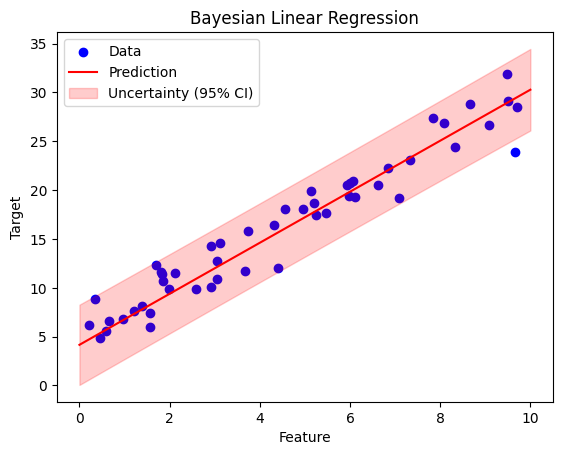

In [16]:
# Plot predictions with uncertainty
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_new, y_pred, color='red', label='Prediction')
plt.fill_between(
    X_new.squeeze(),
    y_pred - 2 * np.sqrt(y_pred_variance),
    y_pred + 2 * np.sqrt(y_pred_variance),
    color='red',
    alpha=0.2,
    label='Uncertainty (95% CI)'
)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Bayesian Linear Regression')
plt.legend()
plt.show()